In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [18]:
df_user = pd.read_csv('user_data.csv')
df_user.head()

,city,education,age
0,"Brooklyn, NY",college,31
1,"Brooklyn, NY",graduate degree,31
2,"Brooklyn, NY",graduate degree,32
3,"Brooklyn, NY",college,37
4,"Brooklyn, NY",college,21


In [19]:
df_pop = pd.read_csv('pop2_data.csv')
df_pop.head()

,city,population_proper
0,"Prairie Ridge, WA",NaN
1,"Edison, WA",NaN
2,"Packwood, WA",NaN
3,"Wautauga Beach, WA",NaN
4,"Harper, WA",NaN


In [20]:
# df_user.info()
# len(df_user)

In [21]:
# df_pop.info()
# len(df_pop)

In [22]:
df = pd.merge(df_user,df_pop)

In [23]:
# df.loc[df.population_proper < 100000, "location"] = "rural"
# df.loc[df.population_proper >= 100000, "location"] = "urban"

df['location'] = df['population_proper'].apply(
    lambda x: 'urban' if x >= 100000 else 'rural'
)

In [24]:
df.head(10)

,city,education,age,population_proper,location
0,"Brooklyn, NY",college,31,2629150.0,urban
1,"Brooklyn, NY",graduate degree,31,2629150.0,urban
2,"Brooklyn, NY",graduate degree,32,2629150.0,urban
3,"Brooklyn, NY",college,37,2629150.0,urban
4,"Brooklyn, NY",college,21,2629150.0,urban
5,"Austin, TX",college,25,947890.0,urban
6,"Austin, TX",graduate degree,22,947890.0,urban
7,"Oakland, CA",graduate degree,29,420005.0,urban
8,"Pittsburgh, PA",college,29,303625.0,urban
9,"Pittsburgh, PA",college,27,303625.0,urban


In [25]:
# df.groupby(['age','education']).education.count().sort_values(ascending=False)

In [26]:
df.groupby('city').age.count().sort_values(ascending=False).head(5)

city
Boston, MA          14
Philadelphia, PA    13
Los Angeles, CA      9
Baltimore, MD        9
New York, NY         8
Name: age, dtype: int64

In [27]:
df.groupby(['city','education']).education.count().sort_values(ascending=False)

city               education      
Philadelphia, PA   graduate degree    11
Boston, MA         college             8
Chicago, IL        graduate degree     7
Boston, MA         graduate degree     6
Los Angeles, CA    graduate degree     6
                                      ..
Nashville, TN      graduate degree     1
New York, NY       high school         1
Oakland, CA        graduate degree     1
Oklahoma City, OK  college             1
Albany, NY         graduate degree     1
Name: education, Length: 100, dtype: int64

In [28]:
dfg = df.groupby(['city','education'])\
.education\
.count()\
.sort_values(ascending=False)\
.sort_index(level=['city','education'],ascending=[True,True])

In [29]:
dfg.filter(like='Boston',axis=0)

city        education      
Boston, MA  college            8
            graduate degree    6
Name: education, dtype: int64

In [30]:
df['location'].value_counts()

urban    174
rural      8
Name: location, dtype: int64

In [31]:
df['age'].value_counts()

31    18
34    13
21    11
22    11
37    11
32    11
29    11
28    11
24    10
33    10
36     9
35     9
27     9
23     8
26     8
25     8
30     7
38     5
44     1
45     1
Name: age, dtype: int64

In [32]:
df.head()

,city,education,age,population_proper,location
0,"Brooklyn, NY",college,31,2629150.0,urban
1,"Brooklyn, NY",graduate degree,31,2629150.0,urban
2,"Brooklyn, NY",graduate degree,32,2629150.0,urban
3,"Brooklyn, NY",college,37,2629150.0,urban
4,"Brooklyn, NY",college,21,2629150.0,urban


In [37]:
data = [
    ['first_name',	'last_name',	'gender'	,'age'	,'visit_date'	,'website_goal'],
    ['James'	,'Mcguire'	,'male'	,50.0	,'2017-10-26',	'Find a job'],
    ['John'	,'Vaughan'	,'male'	,35.0	,'2017-11-09','Pay a bill'],
    ['Robert'	,'Dillon'	,'male'	,33.0	,'2017-11-28','Pay a bill'],
    ['Michael'	,'Cameron'	,'male'	,40.0	,'2017-09-27','When is trash day?'],
    ['William',	'Yang'	,'male'	,38.0	,'2017-11-01','Contact City Council']
]

In [39]:
df = pd.DataFrame(data[1:],columns=data[0])

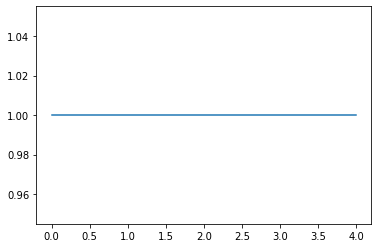

In [43]:
by_day = df.groupby('visit_date').first_name.count()
plt.plot(by_day.values)

Text(0.5, 0, "Index(['2017-09-27'], dtype='object', name='visit_date')")

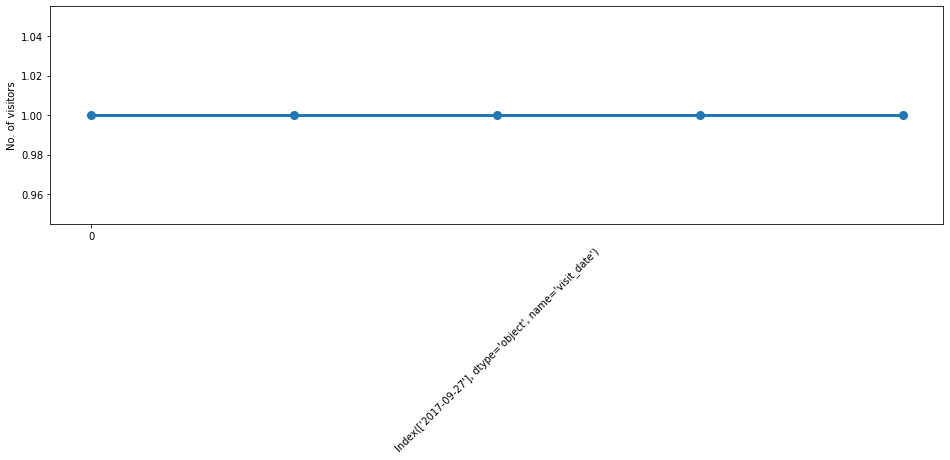

In [53]:
plt.figure(figsize=(16,4))
ax = plt.subplot()
plt.plot(
    by_day.values,
    marker="o",
    markersize=8,
    linewidth=3
)
plt.ylabel('No. of visitors')
ax.set_xticks(range(len(by_day))[::8])
ax.set_xlabel(by_day.index[::8],rotation=45)

(array([1., 1., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([33. , 34.7, 36.4, 38.1, 39.8, 41.5, 43.2, 44.9, 46.6, 48.3, 50. ]),
 <BarContainer object of 10 artists>)

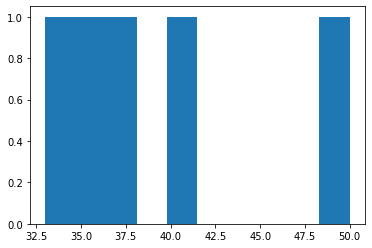

In [54]:
plt.hist(df['age'])

In [57]:
survey_result = df.groupby('website_goal').first_name.count()

([<matplotlib.patches.Wedge at 0x20dd3825188>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Contact City Council'),
  Text(-0.3399187231970732, 1.046162158377023, 'Find a job'),
  Text(-0.8899186574910393, -0.6465638275138399, 'Pay a bill'),
  Text(0.8899187482945414, -0.6465637025335375, 'When is trash day?')])

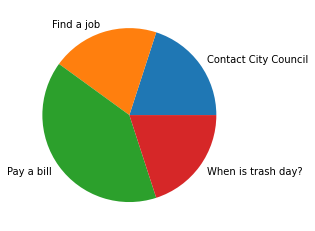

In [58]:
plt.pie(survey_result.values,labels=survey_result.index)

In [59]:
# Load modules
from scipy.stats import chi2_contingency

# Record Data from Google Analytics
control_group = 7700
variant_group = 7700
control_success = 231
variant_success = 308
control_fail = control_group - control_success
variant_fail = variant_group - variant_success

# Perform Chi2 Test
results = chi2_contingency([
  [control_fail, control_success],
  [variant_fail, variant_success]
])

p = results[1]

# Paste Code Here:
if p < 0.05:
    print("Significant!")
if p > 0.05:
    print("Not significant!")

Significant!
